In [511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [512]:
class HarmonicOscillator:
    def __init__(self):
        self.dimensions = 2
        self.frequencies = np.array([1.0])
        self.mass = 1.0
        self.positions =  np.random.normal()
        self.datapoints = 50
        self.max_time = 10
        self.time_array = self.generate_time(self.max_time)
    
    #V = 0.5*mass*w*w*x&x     
    def potential_energy(self,position_array):
        V = 0.5*self.mass* position_array *position_array * self.frequencies*self.frequencies
        return V
    
    def compute_pe_vector(self,positions_array):
        result = []
        for d in range(0,len(positions_array)-1):           
            for point_list in positions_array[d]:
                wave_point = self.potential_energy(point_list)
                result.append(wave_point)
        return result
    
    def kinetic_energy(self):
        #TODO : FINISH THIS METHOD
        return None
    
    def generate_positions(self,mu,sigma):
        s = np.random.normal(mu, sigma, self.datapoints)
        return s
    
    def position_vectors(self):
        result = []       
        x = self.generate_positions(0,10)
        y= self.generate_positions(0,10)
        result.append([x ,y])
        return result
    
    def position_vectors_with_time(self):
        result = []       
        for n_d in range(0,self.dimensions):
            pos = self.generate_positions(0,10)
            result.append([pos])
        t_array=  self.generate_time(self.max_time)
        result.append(t_array)
        return np.array(result).flatten()
    
    def generate_time(self,max_time):
        t_array= np.linspace(0,max_time,self.datapoints)
        return t_array
    
    #prints position and time graph of a particle
    def plot_pos_vs_time(self,pos_list,time):
        plt.plot(time,pos_list)
        plt.xlabel("time")
        plt.ylabel("position")
        plt.show()
        
    def plot_momentum_vs_time(self,momentum_list,time):
        plt.plot(time,momentum_list,'r-')
        plt.xlabel("time")
        plt.ylabel("momentum")
        plt.show()
        
    
class QmHelper:
    
    #computes time dependent wave equation of particle in each dimension
    def compute_wave_vector(self,positions_array,qmHelper,time_array):
        result = []
        for d in range(0,len(positions_array)-1):           
            for point_list in positions_array[d]:
                counter= 0
                p=[]
                for point in point_list:
                    t = harmonic_osc.time_array[counter-1]
                    wave_point = qmHelper.compute_wave_eq_element(point,1,0.2,t)
                    p.append(wave_point)
                    counter=counter+1
                result.append(p)
        return result
    
    def compute_momentum_wave_vector(self,positions_array,qmHelper,time_array):
        result = []
        for d in range(0,len(positions_array)-1):           
            for point_list in positions_array[d]:
                counter= 0
                p=[]
                for point in point_list:
                    t = harmonic_osc.time_array[counter-1]
                    wave_point = qmHelper.compute_momentum(point,1,0.2,t)
                    p.append(wave_point)
                    counter=counter+1
                result.append(p)
        return result
    
    #si(x,w,t) = exp(k*x)*exp(-w*t) = Acos(kx-wt)
    def compute_wave_eq_element(self,element,k,frq,t):
        wave_t = 1.0*mt.cos(k*element-frq*t)
        return wave_t
    
    def compute_momentum(self,element,k,frq,t):
        p_t = -1.0*k*mt.sin(element-frq*t)
        return p_t
harmonic_osc = HarmonicOscillator()
qmHelper = QmHelper()

## Computing positions using Time-dependent Shrodingers wave equation

In [513]:
positions = harmonic_osc.position_vectors_with_time()

In [514]:
wave_eq = qmHelper.compute_wave_vector(positions,qmHelper,harmonic_osc.time_array)

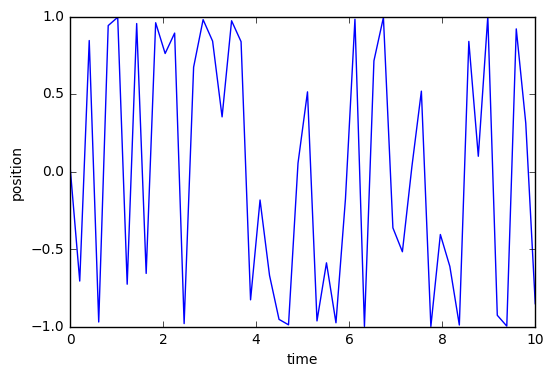

In [515]:
harmonic_osc.plot_pos_vs_time(wave_eq[0],harmonic_osc.time_array)

## Computing momentum

In [516]:
momenum_pos= qmHelper.compute_momentum_wave_vector(positions,qmHelper,harmonic_osc.time_array)

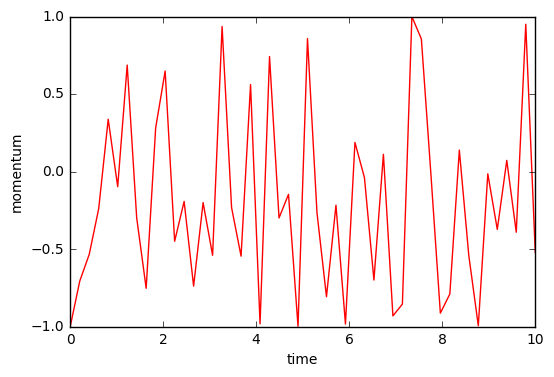

In [517]:
harmonic_osc.plot_momentum_vs_time(momenum_pos[0],harmonic_osc.time_array)

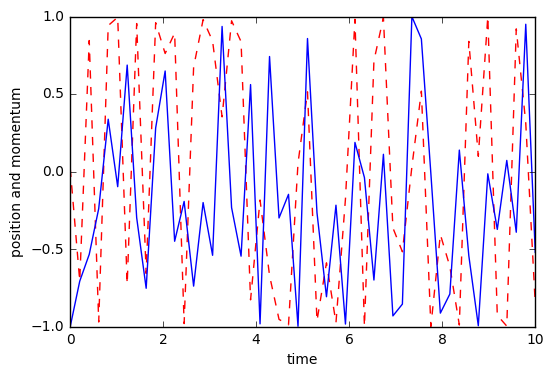

In [518]:
plt.plot(harmonic_osc.time_array, wave_eq[0], 'r--', harmonic_osc.time_array,momenum_pos[0], 'b-')
plt.xlabel("time")
plt.ylabel("position and momentum")
plt.show()

## Computing Potential Energy of the particle

In [519]:
potential_vals = harmonic_osc.compute_pe_vector(positions)

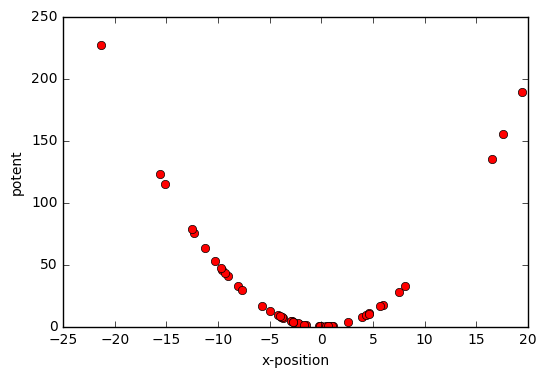

In [520]:
plt.plot(positions[0][0],potential_vals[0],'ro')
plt.xlabel("x-position")
plt.ylabel("potent")
plt.show()

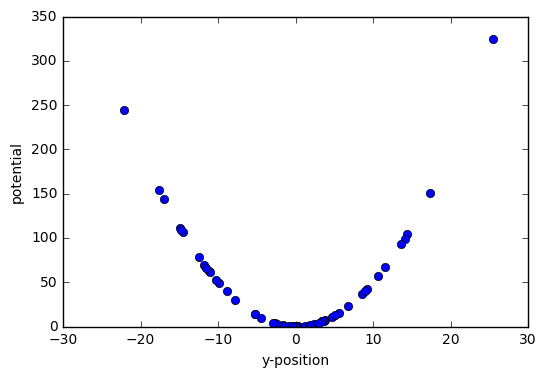

In [521]:
plt.plot(positions[1][0],potential_vals[1],'bo')
plt.xlabel("y-position")
plt.ylabel("potential")
plt.show()